# Jonathan Halverson
# Wednesday, April 6, 2016
# Secondary school data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
# http://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Attributes for student-mat.csv (Math course) datasets:

1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

The three grades above are related with the course subject of Math

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### Data cleaning

In [4]:
df['school'] = df['school'].replace({'GP':0, 'MS':1})
df['sex'] = df['sex'].replace({'M':0, 'F':1})
df['address'] = df['address'].replace({'U':0, 'R':1})
df['famsize'] = df['famsize'].replace({'LE3':0, 'GT3':1})
df['Pstatus'] = df['Pstatus'].replace({'A':0, 'T':1})
# for the non-binary nominal entries, one needs to create indicators (more columns)
df['Mjob'] = df['Mjob'].replace({'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4})
df['Fjob'] = df['Fjob'].replace({'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4})
df['reason'] = df['reason'].replace({'home':0, 'reputation':1, 'course':2, 'other':3})
df['guardian'] = df['guardian'].replace({'mother':0, 'father':1, 'other':2})
df = df.applymap(lambda x: 1 if x == 'yes' else x)
df = df.applymap(lambda x: 0 if x == 'no' else x)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null int64
sex           395 non-null int64
age           395 non-null int64
address       395 non-null int64
famsize       395 non-null int64
Pstatus       395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int64
Fjob          395 non-null int64
reason        395 non-null int64
guardian      395 non-null int64
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null int64
famsup        395 non-null int64
paid          395 non-null int64
activities    395 non-null int64
nursery       395 non-null int64
higher        395 non-null int64
internet      395 non-null int64
romantic      395 non-null int64
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc

In [6]:
df.describe().applymap(lambda x: round(x, 1))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,...,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0
mean,0.1,0.5,16.7,0.2,0.7,0.9,2.7,2.5,2.5,3.0,...,3.9,3.2,3.1,1.5,2.3,3.6,5.7,10.9,10.7,10.4
std,0.3,0.5,1.3,0.4,0.5,0.3,1.1,1.1,1.4,1.3,...,0.9,1.0,1.1,0.9,1.3,1.4,8.0,3.3,3.8,4.6
min,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0
25%,0.0,0.0,16.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,...,4.0,3.0,2.0,1.0,1.0,3.0,0.0,8.0,9.0,8.0
50%,0.0,1.0,17.0,0.0,1.0,1.0,3.0,2.0,3.0,4.0,...,4.0,3.0,3.0,1.0,2.0,4.0,4.0,11.0,11.0,11.0
75%,0.0,1.0,18.0,0.0,1.0,1.0,4.0,3.0,4.0,4.0,...,5.0,4.0,4.0,2.0,3.0,5.0,8.0,13.0,13.0,14.0
max,1.0,1.0,22.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,75.0,19.0,19.0,20.0


In [7]:
df.corr().applymap(lambda x: round(x, 1))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.0,0.0,0.4,0.3,-0.1,0.0,-0.1,-0.1,0.1,-0.0,...,-0.0,0.0,-0.0,0.1,0.1,-0.0,-0.1,-0.0,-0.1,-0.0
sex,0.0,1.0,0.0,-0.0,0.1,-0.0,-0.1,-0.0,0.1,-0.0,...,-0.1,-0.2,-0.1,-0.3,-0.3,-0.1,0.1,-0.1,-0.1,-0.1
age,0.4,0.0,1.0,0.1,-0.0,0.0,-0.2,-0.2,0.1,0.1,...,0.1,0.0,0.1,0.1,0.1,-0.1,0.2,-0.1,-0.1,-0.2
address,0.3,-0.0,0.1,1.0,0.1,0.0,-0.1,-0.1,0.1,0.1,...,-0.0,-0.0,-0.1,0.1,0.1,0.0,0.0,-0.1,-0.1,-0.1
famsize,-0.1,0.1,-0.0,0.1,1.0,0.1,0.0,0.1,0.1,-0.0,...,0.0,-0.0,-0.0,-0.1,-0.1,0.0,-0.0,-0.1,-0.1,-0.1
Pstatus,0.0,-0.0,0.0,0.0,0.1,1.0,-0.1,-0.1,-0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,-0.1,-0.0,-0.0,-0.1
Medu,-0.1,-0.1,-0.2,-0.1,0.0,-0.1,1.0,0.6,-0.5,-0.2,...,-0.0,0.0,0.1,0.0,-0.0,-0.0,0.1,0.2,0.2,0.2
Fedu,-0.1,-0.0,-0.2,-0.1,0.1,-0.1,0.6,1.0,-0.3,-0.4,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.2,0.2,0.2
Mjob,0.1,0.1,0.1,0.1,0.1,-0.0,-0.5,-0.3,1.0,0.3,...,0.0,-0.1,-0.0,-0.0,-0.0,-0.1,0.0,-0.2,-0.2,-0.1
Fjob,-0.0,-0.0,0.1,0.1,-0.0,0.0,-0.2,-0.4,0.3,1.0,...,0.0,0.1,0.0,-0.1,0.1,-0.0,0.0,-0.2,-0.1,-0.1


The correlation matrix indicates that G3 is correlated with G1 and G2. There is a correlation of -0.4 with failures and G3.

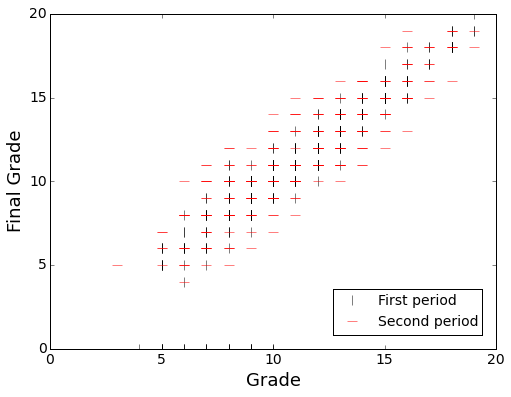

In [8]:
plt.plot(df.G2, df.G3, 'k|', label='First period', ms=10)
plt.plot(df.G1, df.G3, 'r_', label='Second period', ms=10)
plt.xlabel('Grade')
plt.ylabel('Final Grade')
plt.legend(loc='lower right')

We see that both predictors give a good indication of G3. However, G1 or First period has values of zero for G3. A one-feature model would be G3 ~ G2.

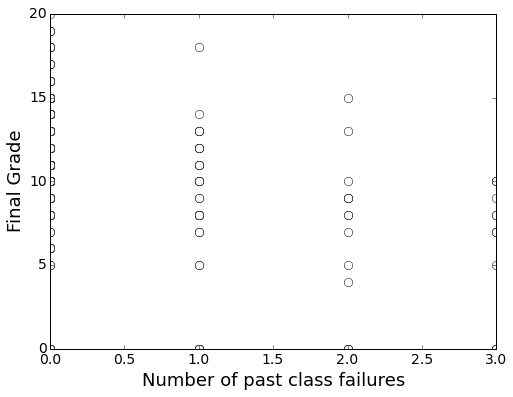

In [9]:
plt.plot(df.failures, df.G3, 'wo')
plt.xlabel('Number of past class failures')
plt.ylabel('Final Grade')

(-0.2, 1.2)

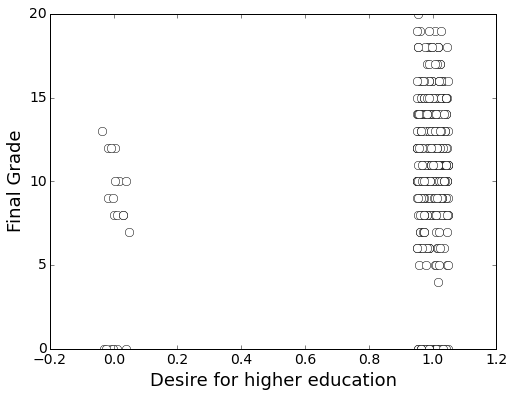

In [10]:
from random import random as rng
plt.plot(df.higher + np.array([0.1*(rng() - 0.5) for _ in range(len(df))]), df.G3, 'wo')
plt.xlabel('Desire for higher education')
plt.ylabel('Final Grade')
plt.xlim(-0.2, 1.2)